In [74]:
# imports
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from math import exp

# allow plots to appear directly in the notebook
import seaborn as sns
%matplotlib inline

In [117]:
data = pd.read_csv(r'C:\Users\alsherman\Desktop\GitHub\DataScience_GeneralAssembly\Data\Cleaned_Data_May_13.csv')

In [120]:
data.describe()

,average_image_size,bedroom,cat,dog,image_number,price,grocery_list,gym_list,movie_theatre_list,train_station_list,airport_list,subway_station_list,Barnes_and_Nobles_list,Deloitte_list,Starbucks_list,smokings
count,6708.000000,6704.000000,7709,7709,6708.000000,6708.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160,2160.000000,2160.000000,2160.000000,2160.000000,7709.000000
mean,225442.754919,1.725089,0,0,8.041890,1880.330203,9.638889,6.885185,1.167593,2.424074,0,1.746759,0.208333,0.737963,3.790741,0.728369
std,100232.758057,1.143340,0,0,6.282467,831.514556,8.416341,7.481938,1.818455,4.229714,0,3.304977,0.551326,1.449743,5.582984,0.444829
min,0.000000,0.000000,0,0,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,270000.000000,1.000000,0,0,4.000000,1385.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,270000.000000,2.000000,0,0,7.000000,1720.000000,9.000000,4.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,1.000000,1.000000
75%,270000.000000,2.000000,0,0,12.000000,2199.000000,20.000000,14.000000,2.000000,4.000000,0,3.000000,0.000000,1.000000,5.000000,1.000000
max,270000.000000,6.000000,0,0,24.000000,9851.000000,20.000000,20.000000,9.000000,20.000000,0,18.000000,3.000000,6.000000,20.000000,1.000000


In [119]:
#data = data[0:6708]

data = data[['average_image_size','bedroom','cat','dog','image_number','price','grocery_list',
             'gym_list','movie_theatre_list','train_station_list','airport_list','subway_station_list',
             'Barnes_and_Nobles_list','Deloitte_list','Starbucks_list','smokings']]

In [121]:
data.head(2)

,average_image_size,bedroom,cat,dog,image_number,price,grocery_list,gym_list,movie_theatre_list,train_station_list,airport_list,subway_station_list,Barnes_and_Nobles_list,Deloitte_list,Starbucks_list,smokings
0,270000,2,0,0,18,1310,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,860,19,14,2,7,0,3,0,2,7,1


In [122]:
print len(data)
#data = data.dropna(axis=1)
print len(data)

7709
7709


In [123]:
### SCIKIT-LEARN ###

# create X and y
feature_cols = ['cat','dog','smokings','gym_list','movie_theatre_list']

X = data[feature_cols]
y = data.price

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the intercept
print lm2.intercept_

# pair the feature names with the coefficients
print zip(feature_cols, lm2.coef_)

# print the R-squared value for the model
print lm2.score(X, y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

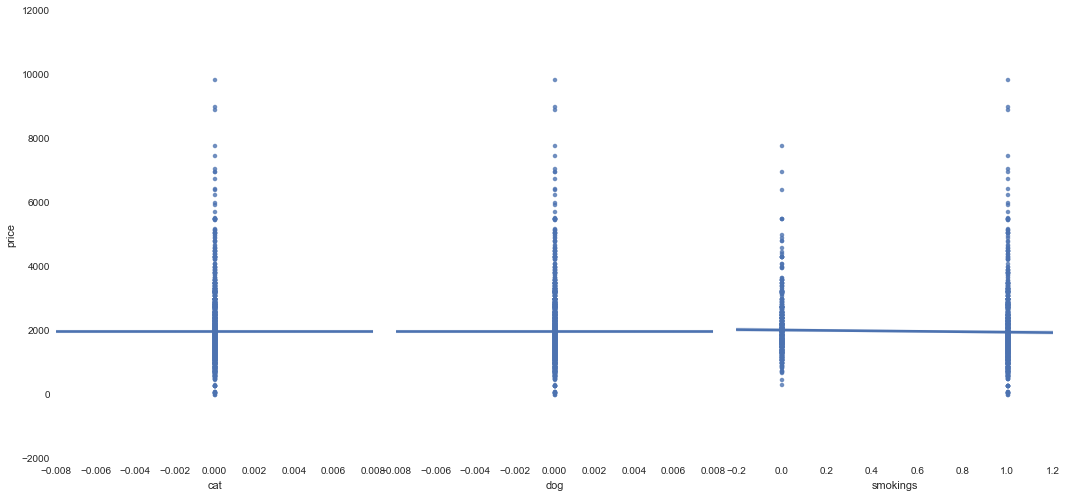

In [100]:
sns.pairplot(data, x_vars=['cat','dog','smokings'], y_vars='price', size=7, aspect=0.7, kind='reg')

## Logistic Regression

In [101]:
# create X and y
feature_cols = ['cat','dog','smokings']

X = data[feature_cols]
y = data.price

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2)

# Fit model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test) # Predict

# Access accuracy
print metrics.accuracy_score(y_test, y_pred)

0.0351851851852


In [102]:
con_mat = metrics.confusion_matrix(y_test, y_pred)
print con_mat

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
